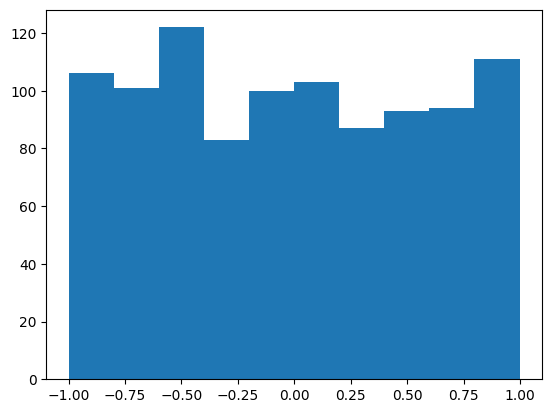

In [1]:
from samplers import get_data_sampler, UniformSampler

set_of_xs = []
data_sampler = UniformSampler(1)
data = data_sampler.sample_xs(1, 1000, 1).squeeze().squeeze()
import matplotlib.pyplot as plt

plt.hist(data)
plt.show()

In [17]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [34]:
data =  data_sampler.sample_xs(10, 1000000, 1)
task = ChebyshevKernelLinearRegression(n_dims=1, batch_size=1000000, basis_dim=1, different_degrees=False, lowest_degree=5, highest_degree=5)
print(data.shape)
ys = task.evaluate(data).squeeze()
print(ys.shape)
ys = ys.reshape(-1)
print(ys.shape)
plt.hist(ys, bins=30)
plt.show()

tensor([[-1.6005e+00, -4.1837e-01],
        [ 7.2950e-01,  1.9861e-01],
        [-1.5300e-01, -5.3792e-02],
        ...,
        [ 2.5719e+00,  1.8758e+00],
        [ 7.8467e-01,  6.5550e-01],
        [ 2.4351e+00,  2.3734e+02]])
tensor([[[-0.7928],
         [-0.2072]],

        [[ 0.7860],
         [ 0.2140]],

        [[-0.7399],
         [-0.2601]],

        ...,

        [[ 0.5782],
         [ 0.4218]],

        [[ 0.5448],
         [ 0.4552]],

        [[ 0.0102],
         [ 0.9898]]])
torch.Size([1000000, 10, 1])
tensor([[[-0.7928],
         [-0.2072]],

        [[ 0.7860],
         [ 0.2140]],

        [[-0.7399],
         [-0.2601]],

        ...,

        [[ 0.5782],
         [ 0.4218]],

        [[ 0.5448],
         [ 0.4552]],

        [[ 0.0102],
         [ 0.9898]]])
tensor([[[ 1.0000, -0.7940],
         [ 1.0000, -0.3142],
         [ 1.0000,  0.1780],
         ...,
         [ 1.0000,  0.6025],
         [ 1.0000,  0.8264],
         [ 1.0000,  0.3364]],

        [[ 1.0000, 

tensor([[[ -2.3260],
         [  1.2309],
         [  0.0000],
         ...,
         [  0.0000],
         [  0.0000],
         [  0.0000]],

        [[  0.3787],
         [ -4.0776],
         [-44.4882],
         ...,
         [  0.0000],
         [  0.0000],
         [  0.0000]],

        [[ -0.1537],
         [ -3.0111],
         [  8.2072],
         ...,
         [  0.0000],
         [  0.0000],
         [  0.0000]],

        ...,

        [[ -2.0268],
         [ -8.5838],
         [  1.3420],
         ...,
         [  0.0000],
         [  0.0000],
         [  0.0000]],

        [[ -0.3020],
         [  3.3427],
         [  0.7709],
         ...,
         [  0.0000],
         [  0.0000],
         [  0.0000]],

        [[ -2.2539],
         [  6.8514],
         [ 21.6025],
         ...,
         [  0.0000],
         [  0.0000],
         [  0.0000]]])
tensor([[[ 1.0000e+00,  5.1762e-01,  2.6793e-01,  ...,  2.6672e-03,
           1.3806e-03,  7.1462e-04],
         [ 1.0000e+00, -4.952

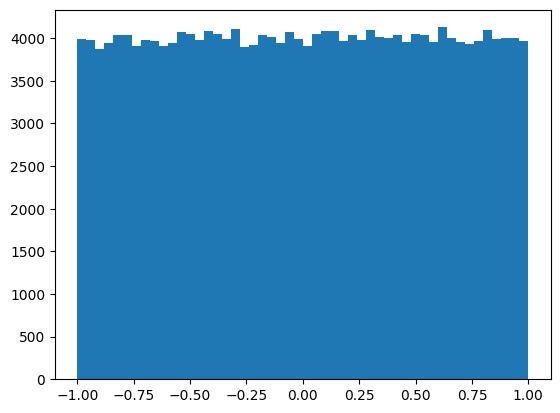

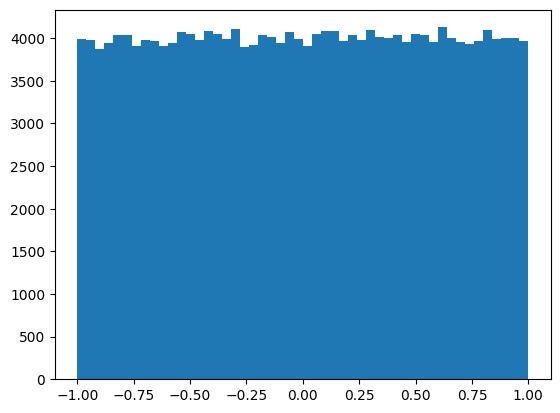

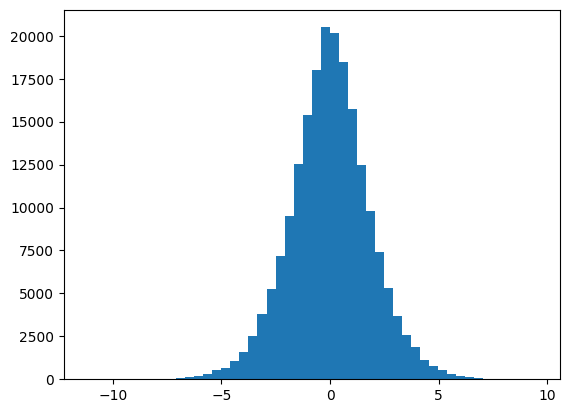

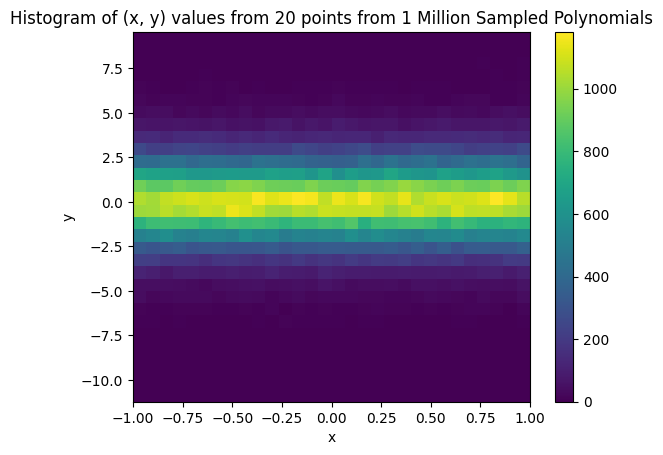

In [21]:
import numpy as np
from tasks import get_task_sampler, ChebyshevKernelLinearRegression
data =  data_sampler.sample_xs(20, 10000, 1)
task = ChebyshevKernelLinearRegression(n_dims=1, batch_size=10000, basis_dim=11, different_degrees=True, lowest_degree=1, highest_degree=11)
ys = task.evaluate(data).squeeze()
ys = ys.reshape(-1)
data = data.reshape(-1)
plt.hist(data, bins=50)
plt.show()
data = data.numpy()
ys = ys.numpy()
plt.hist(data, bins=50)
plt.show()
plt.hist(ys, bins=50)
plt.show()
selected_ys = ys[data < 0.5]
selected_data = data[data < 0.5]
fig = plt.figure()
ax = fig.add_subplot(111)
counts,xedges,yedges,img = ax.hist2d(data,ys, bins=[30,30])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Histogram of (x, y) values from 20 points from 1 Million Sampled Polynomials")
plt.xlim([-1, 1])
plt.colorbar(img)
plt.show()